In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error


In [170]:
CENTRE = 13000
STD    = 10000
NUM_SAMPLES = 400_000

# Target

count    400000.000000
mean      13918.683708
std        8690.073639
min           0.195046
25%        6981.488379
50%       13109.310050
75%       19778.131287
max       59562.977497
dtype: float64


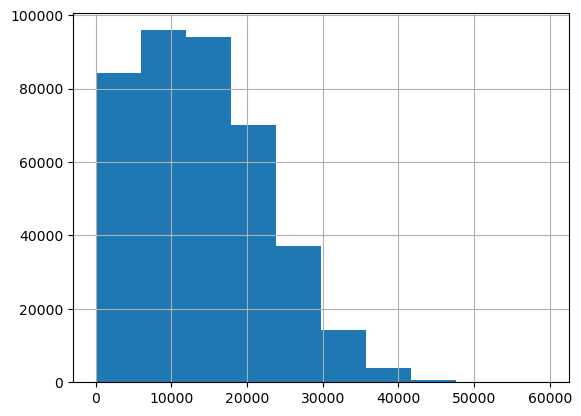

In [171]:
target = pd.Series(np.abs(np.random.normal(CENTRE, STD, NUM_SAMPLES))) # generate positive values
print(target.describe())
target.hist();

# Predict median

In [135]:
preds = pd.Series([target.median()]*target.shape[0])
preds.describe().round(1)

count    400000.0
mean      13000.0
std           0.0
min       13000.0
25%       13000.0
50%       13000.0
75%       13000.0
max       13000.0
dtype: float64

# MAPE test

In [165]:
def test(NUM_TO_EDIT):
    global NUM_SAMPLES
    MAPE_test = []
    for i in range(1,10):
        # edit first value in target dataset
        target.iloc[:NUM_TO_EDIT] = i
        MAPE_test += [mean_absolute_percentage_error(target, preds)]

    MAPE_test = pd.Series(MAPE_test)  
    MAPE_test.plot()
    plt.xlabel('Edited value of first target')
    plt.ylabel('MAPE')
    plt.show()
    print(MAPE_test.describe().round(3))
    print('\nRatio MAPE max/min', round(MAPE_test.max()/MAPE_test.min(), 3),
          '\nfor NUM_TO_EDIT =', NUM_TO_EDIT,
          '\nit\'s', round(NUM_TO_EDIT/NUM_SAMPLES*100, 3), '% of total samples count'
         )

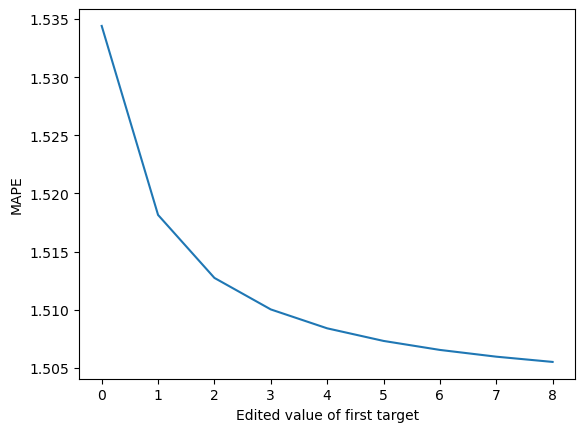

count    9.000
mean     1.512
std      0.009
min      1.506
25%      1.507
50%      1.508
75%      1.513
max      1.534
dtype: float64

Ratio MAPE max/min 1.019 
for NUM_TO_EDIT = 1 
it's 0.0 % of total samples count


In [166]:
test(1)

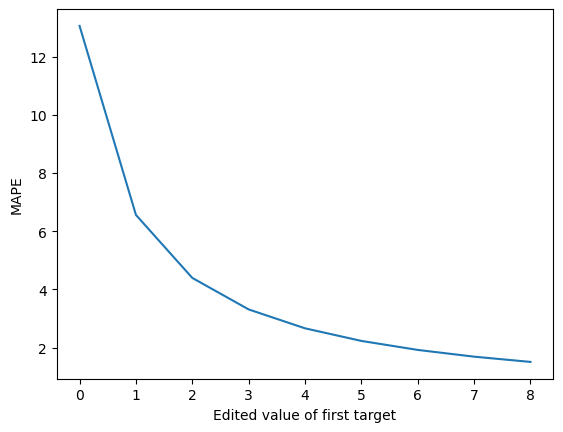

count     9.000
mean      4.147
std       3.707
min       1.506
25%       1.918
50%       2.661
75%       4.394
max      13.061
dtype: float64

Ratio MAPE max/min 8.675 
for NUM_TO_EDIT = 400 
it's 0.1 % of total samples count


In [167]:
test(400)